<a href="https://colab.research.google.com/github/AnshTanwar/NML-Food-Demand-Forecasting/blob/main/food_demand_nml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
pip install nannyml

INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 51.6 MB/s 

In [ ]:
import pandas as pd
import nannyml as nml
from sklearn.model_selection import train_test_split



# Load the dataset (train.csv, test.csv)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Merge the additional information files (optional)
fulfillment_data = pd.read_csv('fulfilment_center_info.csv')
meal_data = pd.read_csv('meal_info.csv')



In [ ]:
train_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
train_data['center_id'].value_counts()

,center_id
13,7046
10,7015
52,6993
43,6970
67,6915
...,...
139,4627
57,4501
162,4366
41,4083


In [ ]:
train_data.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
meal_data.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
fulfillment_data.head(7)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
5,64,553,77,TYPE_A,4.4
6,129,593,77,TYPE_A,3.9


In [ ]:
train_data['center_id'].value_counts()

,center_id
13,7046
10,7015
52,6993
43,6970
67,6915
...,...
139,4627
57,4501
162,4366
41,4083


In [ ]:
#train_data = train_data[train_data['center_id'] == 13]

In [ ]:
# # Assuming `demand_by_week` is your original DataFrame containing the data
# # Grouping by week and calculating unique and total center_id counts
# center_count_by_week = train_data.groupby('week').agg(
#     unique_center_count=('center_id', 'nunique'),
#     total_center_count=('center_id', 'count'),
#     total_meal_count=('meal_id', 'nunique'),
#     total_orders = ('num_orders', 'sum')
# ).reset_index()

# # Print the result
# print("Count of unique and total center_id for each week:")
# print(center_count_by_week)

In [ ]:
train_data.shape

(456548, 9)

In [ ]:
meal_data.shape

(51, 3)

In [ ]:
fulfillment_data.shape

(77, 5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import numpy as np

(0.0, 1600.0)

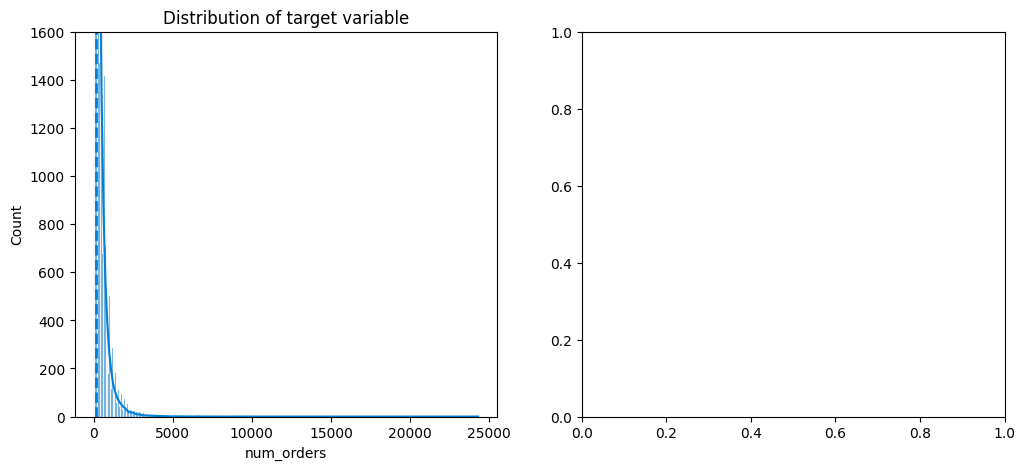

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

palette ={False: '#00C8E5', True: '#3b0280'}
sns.histplot(data=train_data, x="num_orders", color='#007FDB', kde=True, ax=axes[0])
axes[0].axvline(train_data['num_orders'].median(), color='#007FDB', ls='--', lw=2)
axes[0].set_title('Distribution of target variable')
axes[0].set_xlabel('num_orders')
axes[0].set_ylim(0, 1600)

# EDA

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
train_data.drop(['id'], axis=1, inplace=True)

In [ ]:
train_data.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
train_cat = train_data[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = train_data[['week','checkout_price','base_price','num_orders']]

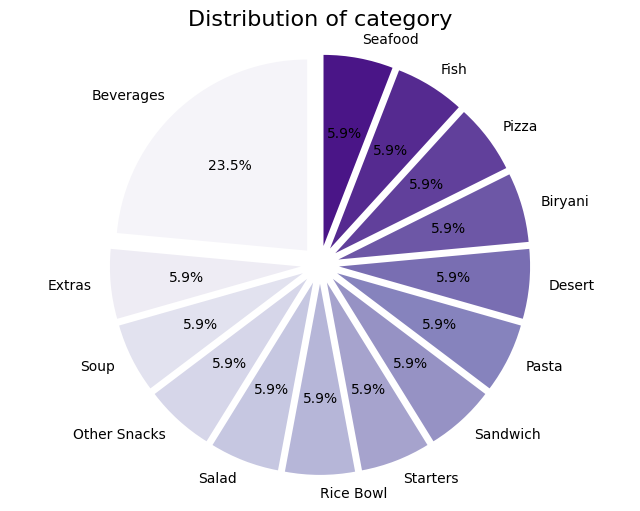

In [ ]:
# Count the occurrences of each cuisine
df = meal_data
cuisine_counts = df['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cuisine_counts,
        labels=cuisine_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Purples", len(cuisine_counts)),
        explode=[0.1] * len(cuisine_counts))  # Slightly explode each slice for effect

# Set equal aspect ratio to ensure the pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of category', fontsize=16)
plt.show()

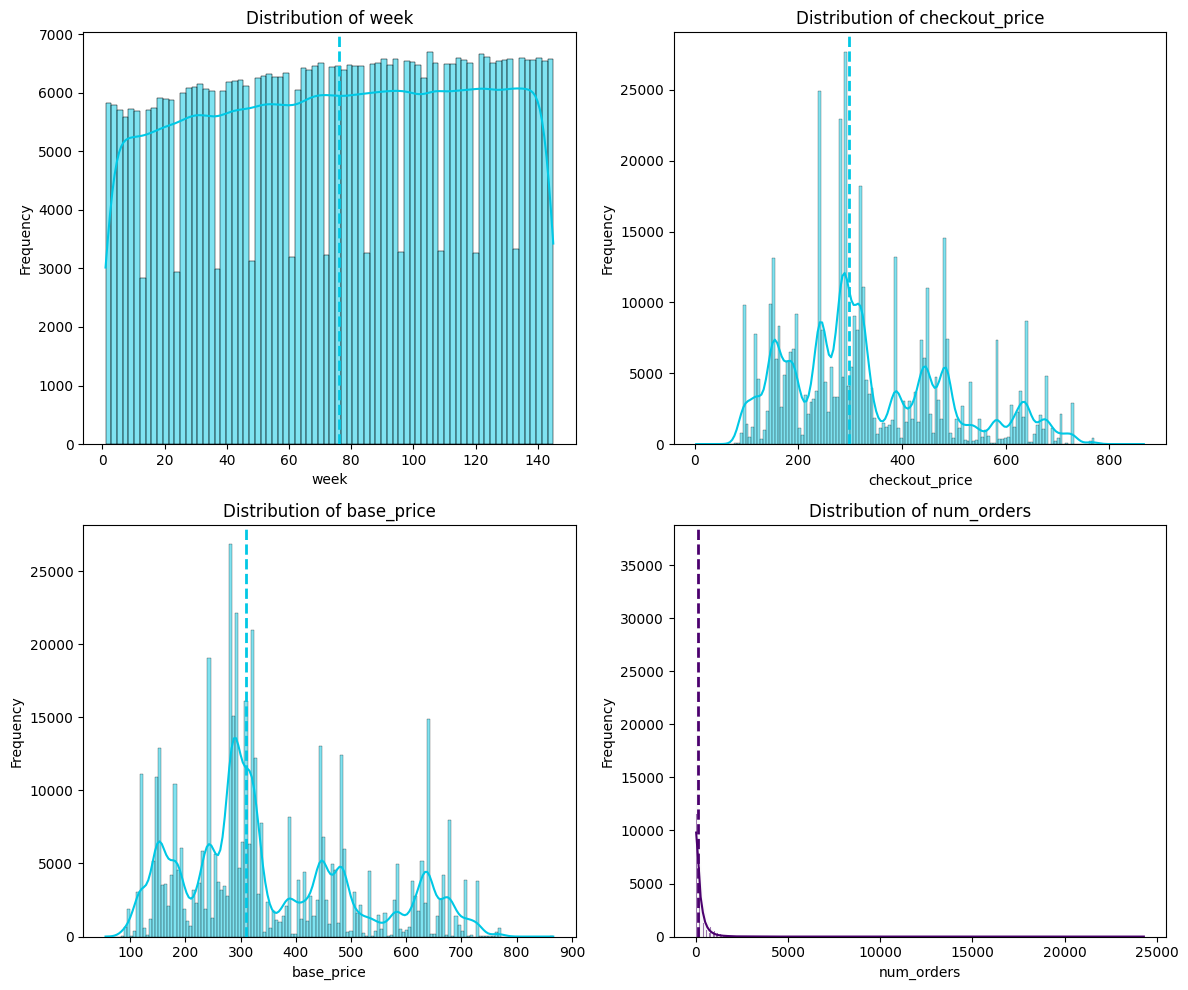

In [ ]:
# Create subplots for each numerical column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusting the number of subplots as needed
axes = axes.flatten()  # Flattening the axes array for easy indexing

palette = {'num_orders': '#4B006E'}  # Define color palette

for i, column in enumerate(train_num.columns):
    sns.histplot(data=train_num, x=column, color=palette.get(column, '#4B006E'), kde=True, ax=axes[i])
    axes[i].axvline(train_num[column].median(), color=palette.get(column, '#00C8E5'), ls='--', lw=2)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

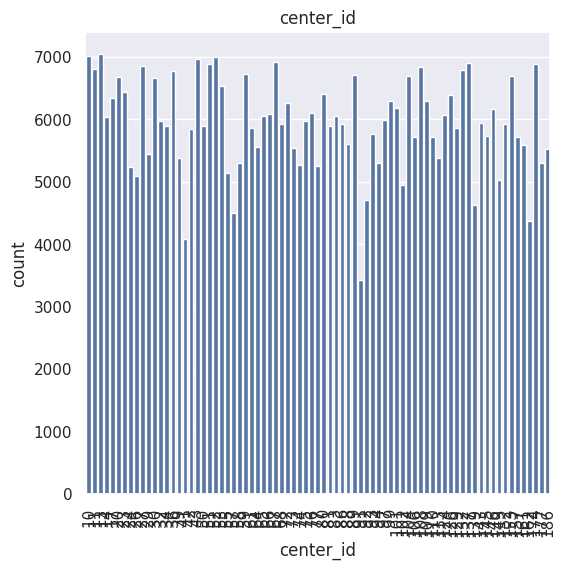

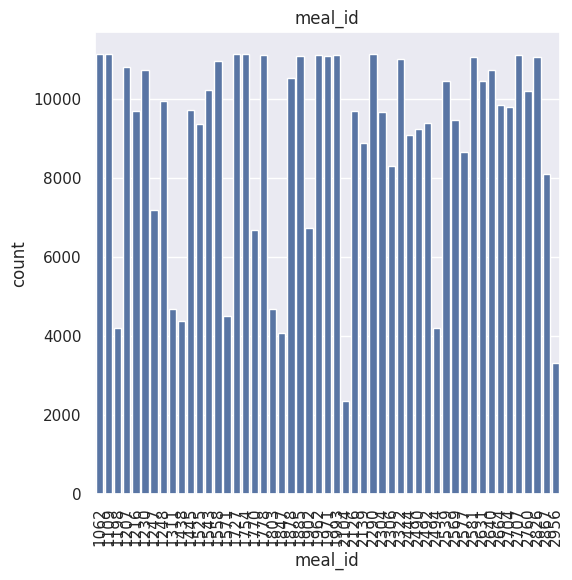

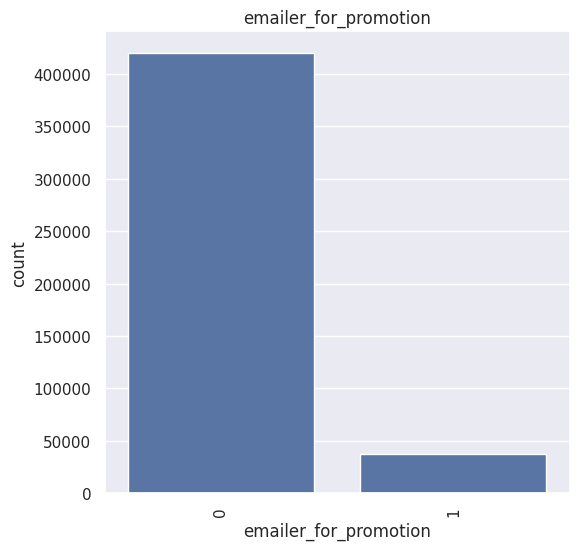

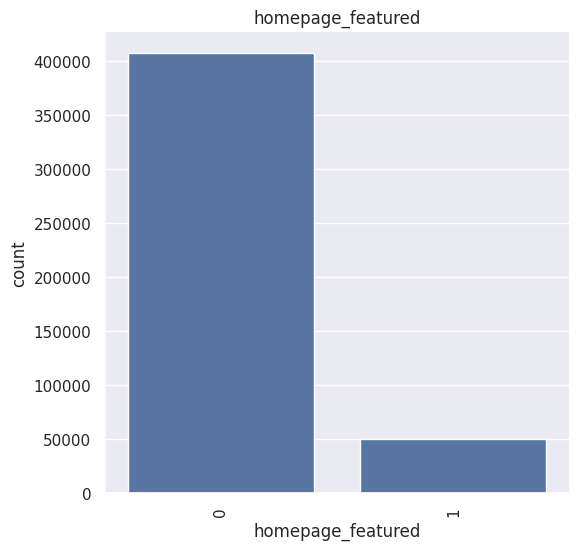

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in train_cat.columns:
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    plt.xticks(rotation=90)

    # Use countplot for categorical data visualization
    sns.countplot(x=train_cat[i])

    plt.title(i)  # Set title
    plt.show()


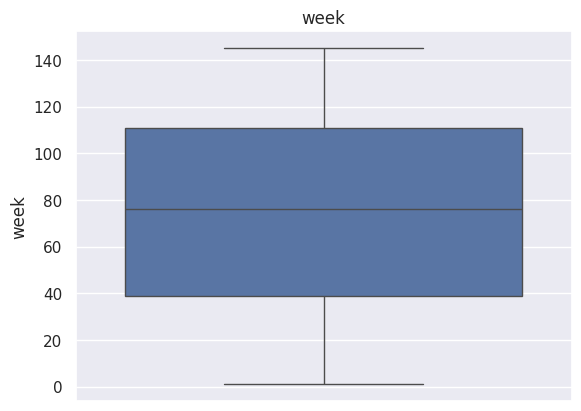

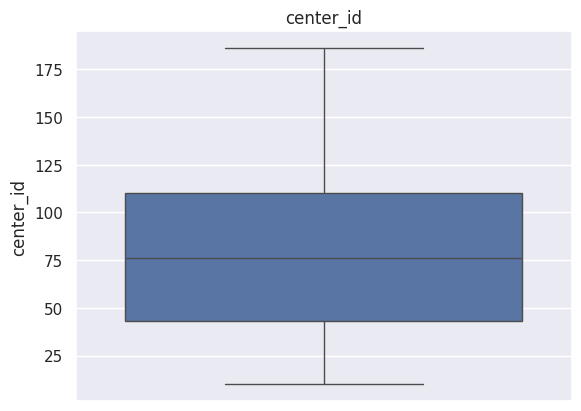

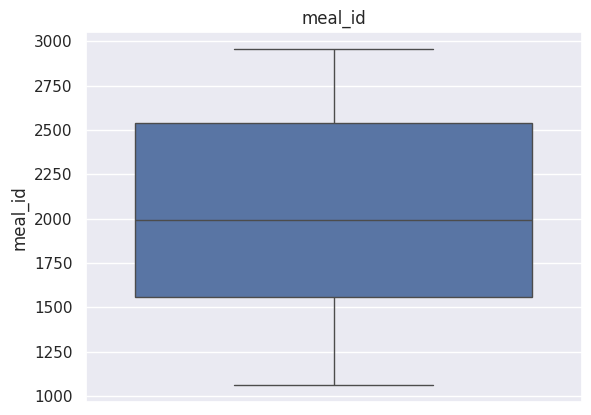

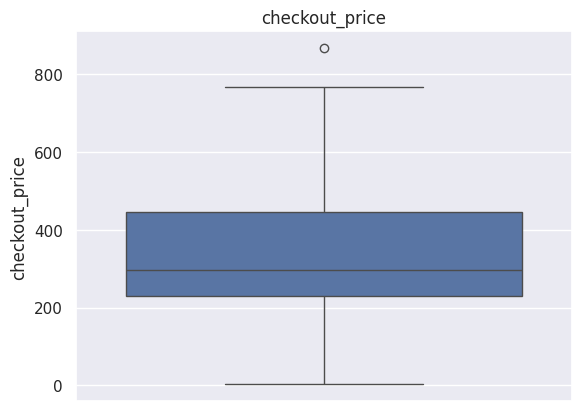

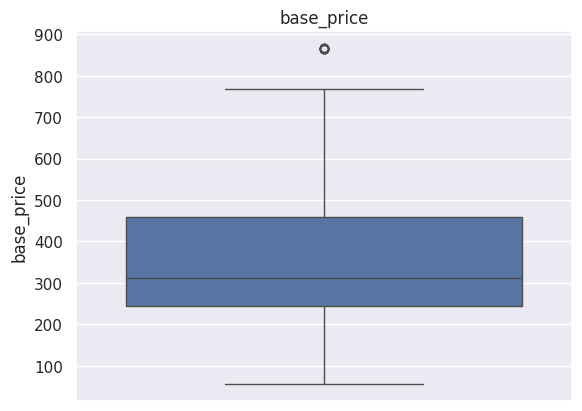

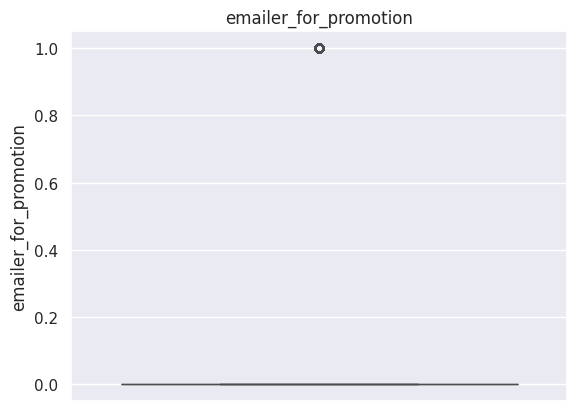

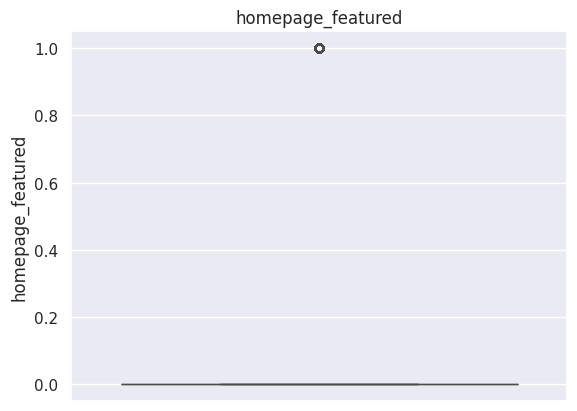

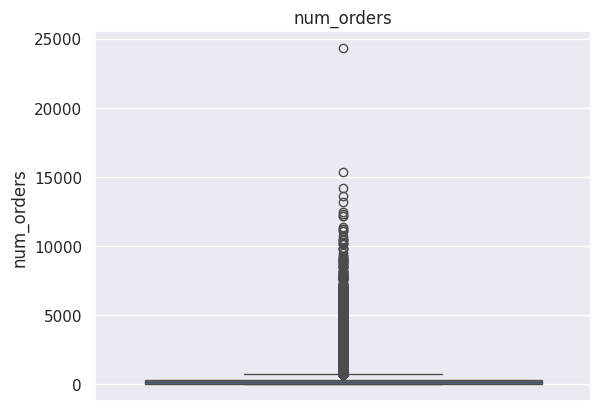

In [ ]:
for i in train_data.columns:
    sns.boxplot(train_data[i])
    plt.title(i)
    plt.show()

# Basic Data Preprocessing

In [ ]:
# Remove Outliers

In [ ]:
def outlinefree(dataCol):

    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange

    colname = dataCol.tolist()               # convert column into list
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):

        if colname[i] > UpperRange:          # list number > Upperrange
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
    return newlist

In [ ]:
train_data.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
for i in range(len(train_num.columns)):
    new_list =  outlinefree(train_data.loc[:,train_num.columns[i]]) # retrun new list
    train_data.loc[:,train_num.columns[i]] = new_list

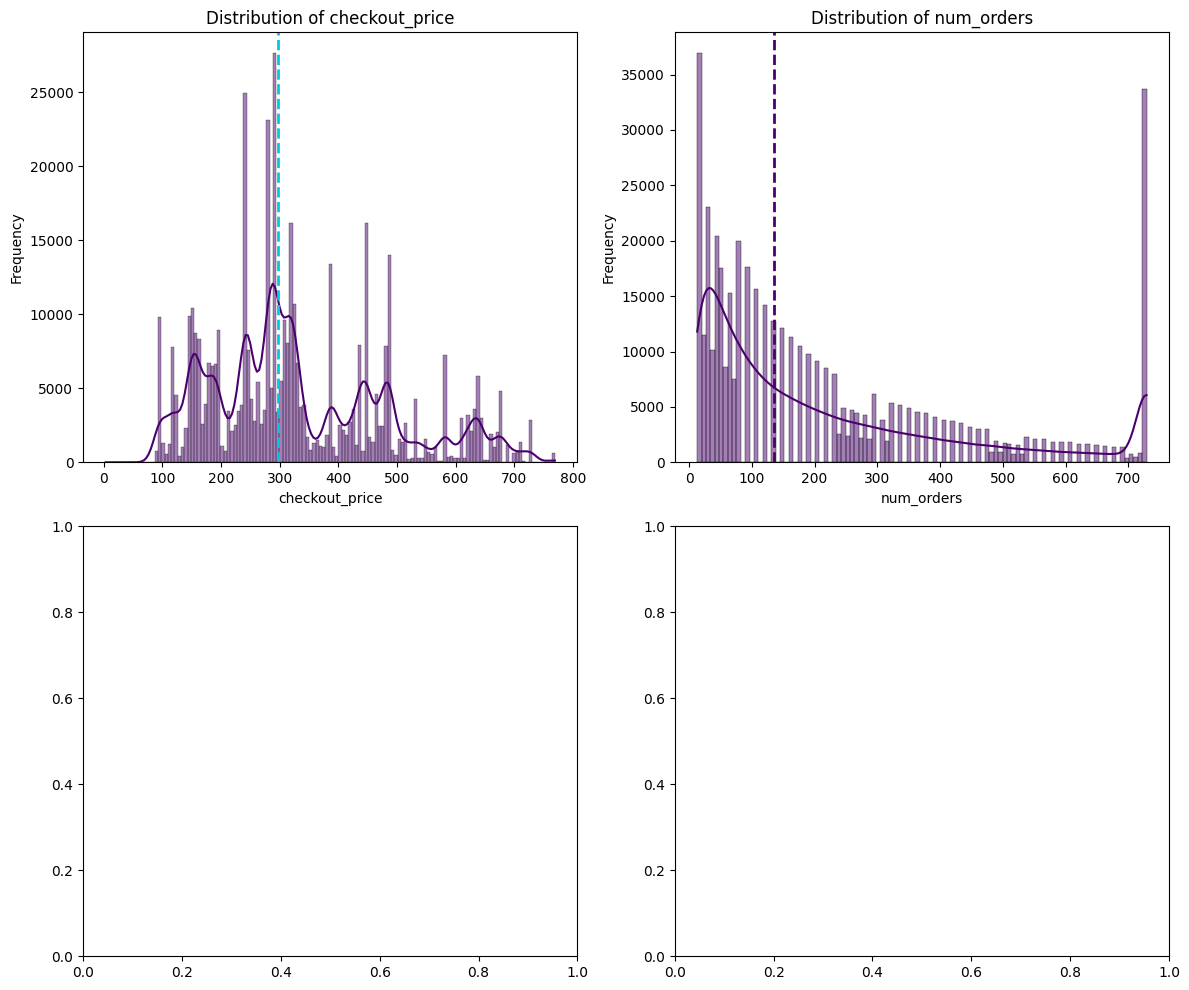

In [ ]:
train_cat = train_data[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = train_data[['checkout_price','num_orders']] #'week',,'base_price'
# Create subplots for each numerical column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusting the number of subplots as needed
axes = axes.flatten()  # Flattening the axes array for easy indexing

palette = {'num_orders': '#4B006E'}  # Define color palette

for i, column in enumerate(train_num.columns):
    sns.histplot(data=train_num, x=column, color=palette.get(column, '#4B006E'), kde=True, ax=axes[i])
    axes[i].axvline(train_num[column].median(), color=palette.get(column, '#00C8E5'), ls='--', lw=2)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

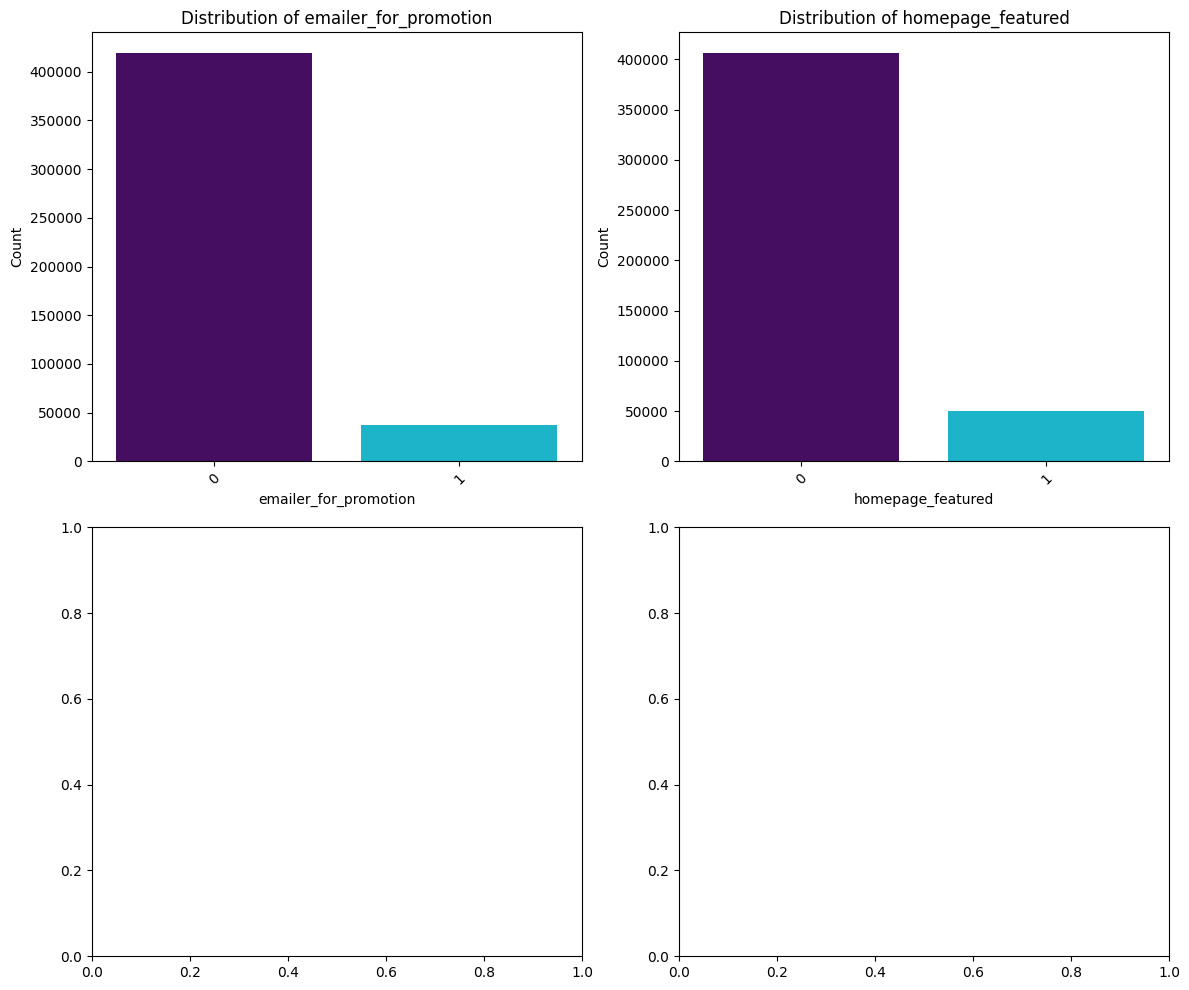

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is your DataFrame
train_cat = train_data[['emailer_for_promotion', 'homepage_featured']]
train_num = train_data[['checkout_price', 'num_orders']]  # You can adjust as needed

# Create subplots for each categorical column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusting the number of subplots as needed
axes = axes.flatten()  # Flattening the axes array for easy indexing

# Define color palette
palette = {'0': '#4B006E', '1': '#00C8E5'}  # Modify as per your categorical data

# Create bar plots for each categorical column
for i, column in enumerate(train_cat.columns):
    sns.countplot(data=train_cat, x=column, palette=palette, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


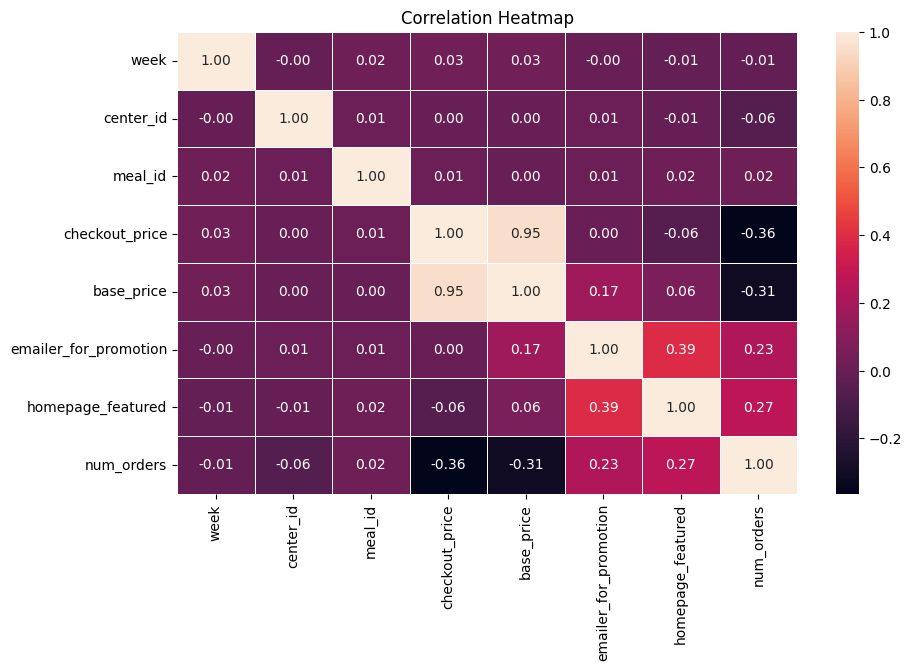

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming train_data is your DataFrame
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Create a purple color palette
#purple_palette = sns.color_palette("violet", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cbar=True)

# Set the title
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#sns.pairplot(train_data)

# Train

In [ ]:
f_train = train_data.loc[:,['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']]
final_train = pd.get_dummies(f_train)
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=33)



# ------------------ LightGBM Regressor ------------------

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print()
print("LightGBM R2 score  :", r2_score(y_test, y_pred_lgbm))
print("LightGBM MSE score  :", mean_squared_error(y_test, y_pred_lgbm))
print("LightGBM RMSE: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

# ------------------ XGBoost Regressor ------------------

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print()
print("XGBoost R2 score  :", r2_score(y_test, y_pred_xgb))
print("XGBoost MSE score  :", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE: ", sqrt(mean_squared_error(y_test, y_pred_xgb)))



LightGBM R2 score  : 0.7479199993827905
LightGBM MSE score  : 11744.161228143917
LightGBM RMSE:  108.37048135052237

XGBoost R2 score  : 0.8172802450633165
XGBoost MSE score  : 8512.73506937962
XGBoost RMSE:  92.26448433378697


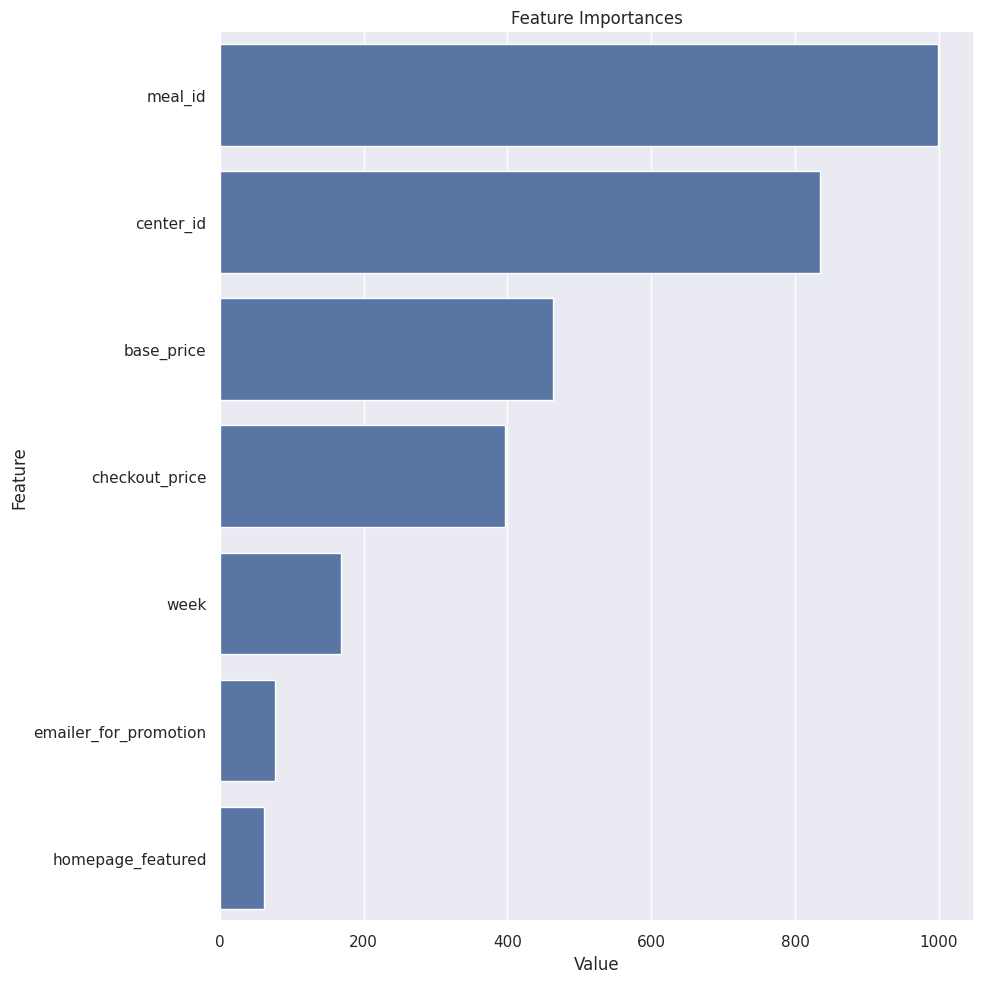

In [ ]:
# Extracting the features and keeping the original column names
f_train = train_data.loc[:, ['num_orders', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
final_train = pd.get_dummies(f_train)

# Keeping the column names for feature importance plotting
feature_names = final_train.columns[1:]

# Extract the feature values and labels
features = final_train.iloc[:, 1:].values
label = final_train.iloc[:, :1].values

# Plot feature importance with original names
def plot_importance(model, features, num=len(features[0]), save=False):
    # Create DataFrame with feature importances and column names
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features})

    # Plot the feature importance
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

    # Save the plot if requested
    if save:
        plt.savefig("importances.png")

# Train LightGBM model
model = LGBMRegressor()
model.fit(features, label)

# Plot importance with original feature names
plot_importance(model, feature_names, num=30)


# Apply Nanny ML

In [ ]:
data = train_data
data.tail()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,145,61,1543,484.09,484.09,0,0,68.0
456544,145,61,2304,482.09,482.09,0,0,42.0
456545,145,61,2664,237.68,321.07,0,0,501.0
456546,145,61,2569,243.50,313.34,0,0,729.0
456547,145,61,2490,292.03,290.03,0,0,162.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 27.9 MB


In [ ]:
# Define the starting date (e.g., January 1, 2020)
start_date = pd.to_datetime('2020-01-01')
# Convert week to datetime
data['date'] = start_date + pd.to_timedelta((data['week'] - 1) * 7, unit='d')

In [ ]:
# Flag categoric columns as categoric
categoric_columns = ['center_id', 'meal_id','emailer_for_promotion','homepage_featured']
#data[categoric_columns] = data[categoric_columns].astype('category')


In [ ]:
data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,date
0,1,55,1885,136.83,152.29,0,0,177.0,2020-01-01
1,1,55,1993,136.83,135.83,0,0,270.0,2020-01-01
2,1,55,2539,134.86,135.86,0,0,189.0,2020-01-01
3,1,55,2139,339.50,437.53,0,0,54.0,2020-01-01
4,1,55,2631,243.50,242.50,0,0,40.0,2020-01-01


In [ ]:
data['date']

,date
0,2020-01-01
1,2020-01-01
2,2020-01-01
3,2020-01-01
4,2020-01-01
...,...
456543,2022-10-05
456544,2022-10-05
456545,2022-10-05
456546,2022-10-05


In [ ]:
temp = data

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame with a 'date' column

# Create data partition
data['partition'] = pd.cut(
    data['date'],
    bins=[pd.to_datetime('2020-01-01'),
          pd.to_datetime('2021-06-01'),
          pd.to_datetime('2021-11-01'),
          pd.to_datetime('2022-10-05')],
    right=False,
    labels=['train', 'test', 'prod']
)

# Display the resulting DataFrame with partitions
print(data['partition'].value_counts())


print(data.head(10))  # Display the first few rows of the DataFrame


train    224845
prod     157049
test      71386
Name: partition, dtype: int64
   center_id  meal_id  checkout_price  base_price  emailer_for_promotion  \
0         55     1885          136.83      152.29                      0   
1         55     1993          136.83      135.83                      0   
2         55     2539          134.86      135.86                      0   
3         55     2139          339.50      437.53                      0   
4         55     2631          243.50      242.50                      0   
5         55     1248          251.23      252.23                      0   
6         55     1778          183.36      184.36                      0   
7         55     1062          182.36      183.36                      0   
8         55     2707          193.06      192.06                      0   
9         55     1207          325.92      384.18                      0   

   homepage_featured  num_orders       date partition  
0                  0       17

In [ ]:
data = data.drop(columns=['week'])

KeyError: "['week'] not found in axis"

In [ ]:
data.columns

Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'date',
       'partition'],
      dtype='object')

In [ ]:
#data.drop(columns=["week"], index=0, inplace=True)

In [ ]:
# Set target and features
target = 'num_orders'
features = [col for col in data.columns if col not in [target, 'date', 'partition']]

# Split the data
X_train = data.loc[data['partition'] == 'train', features]
y_train = data.loc[data['partition'] == 'train', target]

X_test = data.loc[data['partition'] == 'test', features]
y_test = data.loc[data['partition'] == 'test', target]

X_prod = data.loc[data['partition'] == 'prod', features]
y_prod = data.loc[data['partition'] == 'prod', target]

In [ ]:
X_train

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,55,1885,136.83,152.29,0,0
1,55,1993,136.83,135.83,0,0
2,55,2539,134.86,135.86,0,0
3,55,2139,339.50,437.53,0,0
4,55,2631,243.50,242.50,0,0
...,...,...,...,...,...,...
224840,61,1543,389.03,513.13,0,0
224841,61,2304,389.03,513.13,0,0
224842,61,2664,328.89,326.89,0,0
224843,61,2569,328.89,328.89,0,0


In [ ]:
# Fit the model
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Make baseline predictions
y_pred_train_baseline = np.ones_like(y_train) * y_train.mean()
y_pred_test_baseline = np.ones_like(y_test) * y_train.mean()

# Measure train, test and baseline performance
mae_train = mean_absolute_error(y_train, y_pred_train).round(4)
mae_test = mean_absolute_error(y_test, y_pred_test).round(4)

mae_train_baseline = mean_absolute_error(y_train, y_pred_train_baseline).round(4)
mae_test_baseline = mean_absolute_error(y_test, y_pred_test_baseline).round(4)

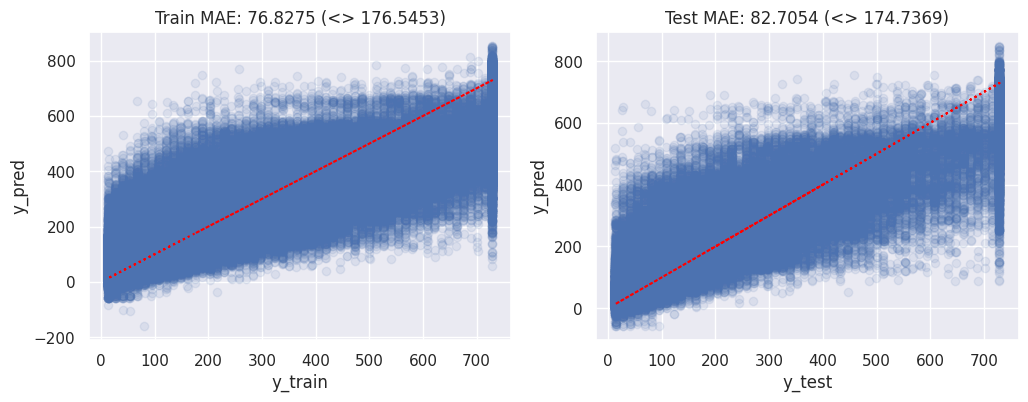

In [ ]:
# Create performance report
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

title1 = 'Train MAE: {} (<> {})'.format(mae_train, mae_train_baseline)
ax1.set(title=title1, xlabel='y_train', ylabel='y_pred')
ax1.plot(y_train, y_train, color='red', linestyle=':')
ax1.scatter(y_train, y_pred_train, alpha=0.1)

title2 = 'Test MAE: {} (<> {})'.format(mae_test, mae_test_baseline)
ax2.set(title=title2, xlabel='y_test', ylabel='y_pred')
ax2.plot(y_test, y_test, color='red', linestyle=':')
ax2.scatter(y_test, y_pred_test, alpha=0.1)

plt.show()

In [ ]:
from lightgbm import LGBMRegressor, plot_importance

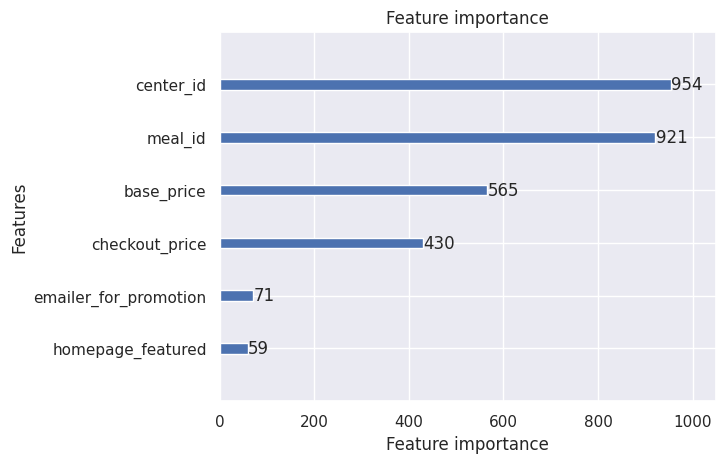

In [ ]:
# plot the feature importance
fig, ax = plt.subplots()
plot_importance(model, ax=ax)
plt.show()

In [ ]:
y_pred_prod = model.predict(X_prod)

In [ ]:
reference_df = X_test.copy() # using the test set as a reference
reference_df['y_pred'] = y_pred_test # reference predictions
reference_df['num_orders'] = y_test # ground truth (currect targets)
reference_df = reference_df.join(data['date']) # date

analysis_df = X_prod.copy() # features
analysis_df['y_pred'] = y_pred_prod # prod predictions
#analysis_df['num_orders'] = y_prod # ground truth (currect targets)
analysis_df = analysis_df.join(data['date']) # date

In [ ]:
# # Convert all category columns to object data type
# category_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']

# reference_df[category_columns] = reference_df[category_columns].astype('object')

In [ ]:
reference_df.describe()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,y_pred,num_orders
count,71386.000000,71386.000000,71386.000000,71386.000000,71386.000000,71386.000000,71386.000000,71386.000000
mean,81.872342,2032.676043,330.415827,355.383010,0.083126,0.099669,228.640246,221.089317
std,45.997558,548.877789,150.511469,163.209937,0.276074,0.299561,176.475941,215.894737
min,10.000000,1062.000000,64.020000,81.540000,0.000000,0.000000,-57.617611,13.000000
25%,43.000000,1558.000000,214.400000,242.500000,0.000000,0.000000,80.956006,54.000000
50%,76.000000,1993.000000,300.730000,309.430000,0.000000,0.000000,175.941195,136.000000
75%,110.000000,2569.000000,445.230000,454.990000,0.000000,0.000000,346.033736,324.000000
max,186.000000,2956.000000,738.230000,738.230000,1.000000,1.000000,849.152582,729.000000


In [ ]:
#reference_df = reference_df.drop(['id'], axis=1)

In [ ]:
# # Convert the 'timestamp' column from object to datetime
# reference_df['date'] = pd.to_datetime(reference_df['date'])

# # Check if the conversion was successful
# print(reference_df.info())


In [ ]:
features

['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [ ]:
dle = nml.DLE(
    feature_column_names=features,
    y_pred='y_pred',
    y_true='num_orders',
    timestamp_column_name='date',
    metrics=['mae'],
    chunk_period="M",
)

dle.fit(reference_df)  # fit on the reference (test) data
estimated_performance = dle.estimate(analysis_df)  # estimate on the prod data

In [ ]:
estimated_performance.data.iloc[:3, :6]

chunk                                               \
       key chunk_index start_index end_index start_date   
0  2021-06           0           0     16064 2021-06-01   
1  2021-07           1       16065     29039 2021-07-01   
2  2021-08           2       29040     41990 2021-08-01   

                                 
                       end_date  
0 2021-06-30 23:59:59.999999999  
1 2021-07-31 23:59:59.999999999  
2 2021-08-31 23:59:59.999999999

In [ ]:
import IPython.display as display

# Save the SVG file
figure = estimated_performance.plot()
figure


# multivariate drift

In [ ]:
drdc = nml.DataReconstructionDriftCalculator(
    column_names=features,
    timestamp_column_name='date',
    chunk_period='M',
)

drdc.fit(reference_df)
multivariate_data_drift = drdc.calculate(analysis_df)

In [ ]:
figure = multivariate_data_drift.plot()
figure


In [ ]:
udc = nml.UnivariateDriftCalculator(
    column_names=features,
    timestamp_column_name='date',
    chunk_period='M',
)

udc.fit(reference_df)
univariate_data_drift = udc.calculate(analysis_df)

In [ ]:
univariate_data_drift.data.iloc[:5,:]

chunk                                               \
     chunk                                                
       key chunk_index start_index end_index start_date   
0  2021-06           0           0     16064 2021-06-01   
1  2021-07           1       16065     29039 2021-07-01   
2  2021-08           2       29040     41990 2021-08-01   
3  2021-09           3       41991     58289 2021-09-01   
4  2021-10           4       58290     71385 2021-10-01   

                                               base_price                  \
                                           jensen_shannon                   
                       end_date     period          value upper_threshold   
0 2021-06-30 23:59:59.999999999  reference       0.151481        0.200665   
1 2021-07-31 23:59:59.999999999  reference       0.090788        0.200665   
2 2021-08-31 23:59:59.999999999  reference       0.055829        0.200665   
3 2021-09-30 23:59:59.999999999  reference       0.093454        0.200665   
4 2021-10-31 23:59:59.999999999  reference       0.124478        0.200665   

                   ... emailer_for_promotion        homepage_featured  \
                   ...        jensen_shannon           jensen_shannon   
  lower_threshold  ...       lower_threshold  alert             value   
0            None  ...                  None  False          0.015070   
1            None  ...                  None  False          0.042308   
2            None  ...                  None  False          0.029126   
3            None  ...                  None  False          0.008030   
4            None  ...                  None  False          0.020735   

                                                meal_id                  \
                                         jensen_shannon                   
  upper_threshold lower_threshold  alert          value upper_threshold   
0        0.058612            None  False       0.008009        0.018492   
1        0.058612            None  False       0.006157        0.018492   
2        0.058612            None  False       0.014410        0.018492   
3        0.058612            None  False       0.003940        0.018492   
4        0.058612            None  False       0.007415        0.018492   

                          
                          
  lower_threshold  alert  
0            None  False  
1            None  False  
2            None  False  
3            None  False  
4            None  False  

[5 rows x 31 columns]

In [ ]:
features

['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [ ]:

figure = univariate_data_drift.filter(period='all', metrics='jensen_shannon', column_names=["base_price"]).plot(kind='distribution')
figure

In [ ]:
print("Reference Data Shape:", reference_df.shape)
print("Analysis Data Shape:", analysis_df.shape)


Reference Data Shape: (71386, 9)
Analysis Data Shape: (157049, 8)


In [ ]:
figure = univariate_data_drift.filter(period='all', metrics='jensen_shannon').plot(kind='distribution')

figure

In [ ]:
perfc = nml.PerformanceCalculator(
    metrics=['rmse'],
    y_true='num_orders',
    y_pred='y_pred',
    problem_type='regression',
    timestamp_column_name='date',
    chunk_period='M'
)

perfc.fit(reference_df)
realized_performance = perfc.calculate(analysis_df.assign(num_orders = y_prod))

figure = estimated_performance.filter(period='analysis').compare(realized_performance).plot()
figure

# Injecting data drifts, real world simulations


In [ ]:
reference_df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,y_pred,num_orders,date
325366,55,1885,150.38,149.38,0,0,385.525788,230.0,2022-01-05
325367,55,1993,141.62,142.62,0,0,451.085494,377.0,2022-01-05
325368,55,2539,149.41,148.41,0,0,192.956178,231.0,2022-01-05
325369,55,2139,290.03,290.03,0,0,-25.075060,27.0,2022-01-05
325370,55,2631,153.26,153.26,0,0,4.527250,54.0,2022-01-05


In [ ]:
analysis_df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,y_pred,num_orders,date
367916,55,1885,149.41,150.41,0,0,385.525788,123.0,2022-04-06
367917,55,1993,150.41,148.41,0,0,376.007048,107.0,2022-04-06
367918,55,2539,152.35,152.35,0,0,192.956178,149.0,2022-04-06
367919,55,2139,309.49,309.49,0,0,-14.959948,14.0,2022-04-06
367920,55,2631,149.38,149.38,0,0,16.517026,55.0,2022-04-06


In [ ]:
import nannyml as nml
import pandas as pd
import numpy as np

# Define the function to inject data drift and analyze performance
def inject_drift_and_analyze(reference_df: pd.DataFrame, analysis_df: pd.DataFrame) -> dict:
    # Step 1: Define the features and timestamp
    features = ['center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

    # Function to inject drift for City (center_id)
    def inject_city_drift(data: pd.DataFrame) -> pd.DataFrame:
        data = data.copy()
        # Simulate city-based data drift by increasing demand in certain cities
        data.loc[data['center_id'] == 1, 'num_orders'] *= np.random.uniform(1.1, 2.0)  # Increase demand by 10%-30% for center 1
        return data

    # Function to inject drift for Base Price
    def inject_base_price_drift(data: pd.DataFrame) -> pd.DataFrame:
        data = data.copy()
        # Simulate price inflation or dynamic pricing
        data['base_price'] = data['base_price'] * np.random.uniform(1.05, 1.95)  # Increase prices by 5%-15%
        return data

    # Function to inject drift for Center (competition effect)
    def inject_center_id_drift(data: pd.DataFrame) -> pd.DataFrame:
        data = data.copy()
        # Simulate competition by reducing demand in specific centers
        data.loc[data['center_id'] == 2, 'num_orders'] *= np.random.uniform(0.7, 0.9)  # Decrease demand by 10%-30% for center 2
        return data

    # Function to inject drift for Meal Type (meal_id)
    def inject_meal_type_drift(data: pd.DataFrame) -> pd.DataFrame:
        data = data.copy()
        # Simulate changing preferences for meals by reducing demand for certain meals
        data.loc[data['meal_id'].isin([55, 65, 75]), 'num_orders'] *= np.random.uniform(0.8, 0.9)  # Decrease demand by 10%-20% for specific meals
        return data

    # Function to inject drift for Checkout Price
    def inject_checkout_price_drift(data: pd.DataFrame) -> pd.DataFrame:
        data = data.copy()
        # Simulate dynamic pricing or promotions affecting checkout price
        data['checkout_price'] = data['checkout_price'] * np.random.uniform(0.9, 1.1)  # Random fluctuation of checkout price by +/- 10%
        return data

    # Step 2: Inject data drift separately into copies of the analysis data
    drifted_data_city = inject_city_drift(analysis_df)
    drifted_data_base_price = inject_base_price_drift(analysis_df)
    drifted_data_center = inject_center_id_drift(analysis_df)
    drifted_data_meal = inject_meal_type_drift(analysis_df)
    drifted_data_checkout_price = inject_checkout_price_drift(analysis_df)

    analysis_df_list = [drifted_data_city, drifted_data_base_price, drifted_data_center, drifted_data_meal, drifted_data_checkout_price]
    drift_names = ['City Drift', 'Base Price Drift', 'Center Drift', 'Meal Type Drift', 'Checkout Price Drift']

    results = {}

    for drifted_data, drift_name in zip(analysis_df_list, drift_names):
        print(f"\nAnalyzing performance for {drift_name}...")

        # Step 3: Create the DLE model
        dle = nml.DLE(
            feature_column_names=features,
            y_pred='y_pred',  # Assuming your model predictions are available in 'y_pred' column
            y_true='num_orders',  # Ground truth is 'num_orders'
            timestamp_column_name='date',  # Assuming 'date' is the timestamp
            metrics=['rmse'],
            chunk_period="M",
        )

        # Step 4: Fit the model on the reference data
        dle.fit(reference_df)

        # Step 5: Estimate performance on the drifted data
        estimated_performance = dle.estimate(drifted_data)

        # Step 6: Plot and save the DLE performance estimate
        dle_fig = estimated_performance.plot()
        dle_fig.show()  # You can save it as an SVG file if needed

        # Step 7: Perform Multivariate Data Drift Detection
        drdc = nml.DataReconstructionDriftCalculator(
            column_names=features,
            timestamp_column_name='date',
            chunk_period='M',
        )
        drdc.fit(reference_df)
        multivariate_data_drift = drdc.calculate(drifted_data)

        # Step 8: Plot and save the multivariate drift results
        mv_fig = multivariate_data_drift.plot()
        mv_fig.show()

        # Step 9: Perform Univariate Data Drift Detection
        udc = nml.UnivariateDriftCalculator(
            column_names=features,
            timestamp_column_name='date',
            chunk_period='M',
        )
        udc.fit(reference_df)
        univariate_data_drift = udc.calculate(drifted_data)

        # Step 10: Plot specific univariate drift result

        uv_fig = univariate_data_drift.filter(
            period='all', metrics='jensen_shannon').plot(kind='distribution')
        uv_fig.show()

        # Store results for the drift type
        results[drift_name] = {
            'dle_performance': estimated_performance,
            'multivariate_drift': multivariate_data_drift,
            'univariate_drift': univariate_data_drift
        }

    return results

# Example usage assuming `reference_df` and `analysis_df` are already loaded
# Inject drifts and analyze



In [ ]:
results = inject_drift_and_analyze(reference_df, analysis_df)